<h1> Visualize Correlation + Build Prediction Model</h1>

<h2>1. Load the Merged Dataset</h2>

In [1]:
import pandas as pd

# Load the merged dataset
df = pd.read_csv("/Users/udaymadhusudhan/Downloads/merged_sentiment_sales.csv")

# Preview
df.head()


,YearMonth,Weekly_Sales,Negative,Neutral,Positive,Total_Reviews,Positive_Ratio,Neutral_Ratio,Negative_Ratio
0,2010-02,1.903330e+08,248,1099,4972,6319,0.786833,0.173920,0.039247
1,2010-03,1.819198e+08,247,1222,4926,6395,0.770289,0.191087,0.038624
2,2010-04,2.314124e+08,243,1020,4423,5686,0.777875,0.179388,0.042737
3,2010-05,1.867109e+08,231,1085,4797,6113,0.784721,0.177491,0.037788
4,2010-06,1.922462e+08,218,1077,4339,5634,0.770146,0.191161,0.038694


<h2>2. Plot Sales & Sentiment Over Time</h2>

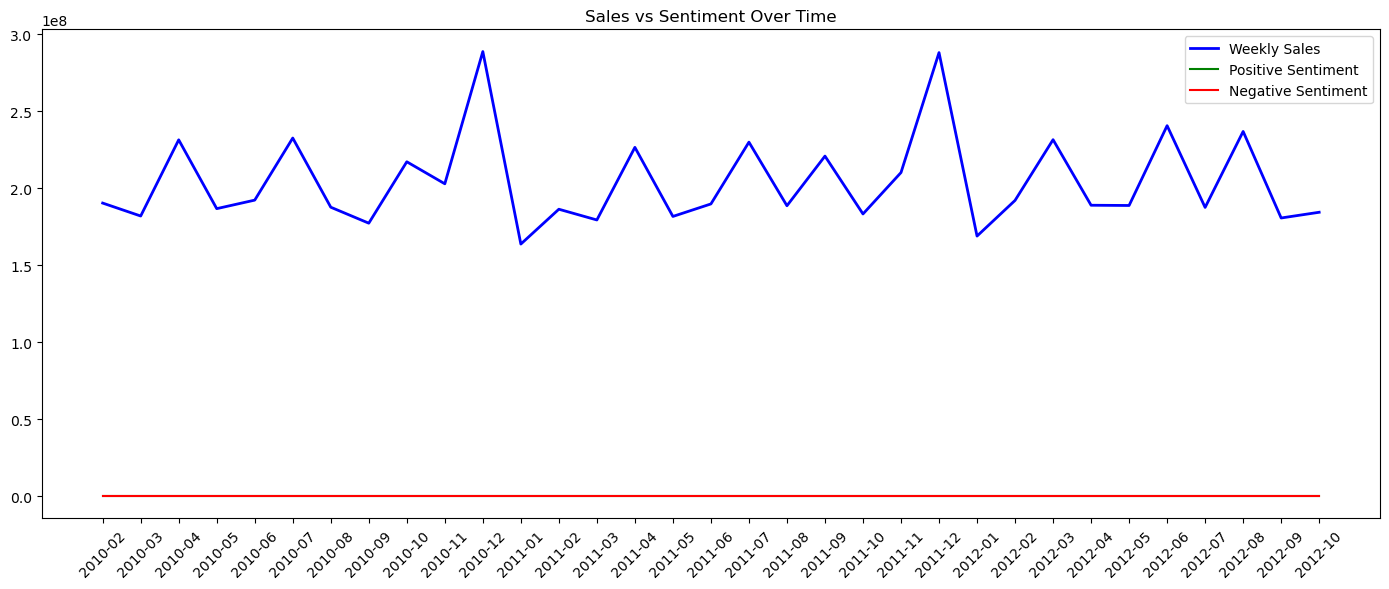

In [2]:
import matplotlib.pyplot as plt

# Plot sales and sentiment ratios over time
plt.figure(figsize=(14,6))
plt.plot(df['YearMonth'], df['Weekly_Sales'], label='Weekly Sales', color='blue', linewidth=2)
plt.plot(df['YearMonth'], df['Positive_Ratio'], label='Positive Sentiment', color='green')
plt.plot(df['YearMonth'], df['Negative_Ratio'], label='Negative Sentiment', color='red')
plt.xticks(rotation=45)
plt.title("Sales vs Sentiment Over Time")
plt.legend()
plt.tight_layout()
plt.show()


<h2>3. Correlation Heatmap</h2>

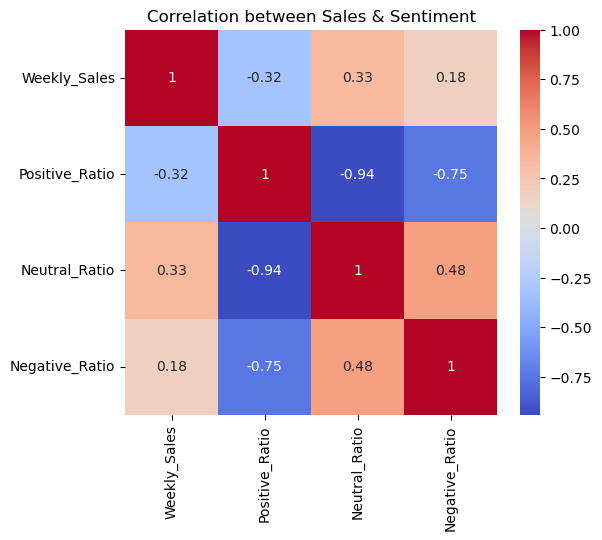

In [3]:
import seaborn as sns

# Select numeric columns
corr_df = df[['Weekly_Sales', 'Positive_Ratio', 'Neutral_Ratio', 'Negative_Ratio']]
corr = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Sales & Sentiment")
plt.show()


<h2>4. Train/Test Split</h2>

In [4]:
from sklearn.model_selection import train_test_split

X = df[['Positive_Ratio', 'Neutral_Ratio', 'Negative_Ratio']]
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h2>5. Train a Regression Model</h2>

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Added import for numpy

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred))
# Calculate RMSE manually by taking the square root of MSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 Score: -0.2857071375138014
RMSE: 20982651.414822772


<h2>6. Visualize Predictions</h2>

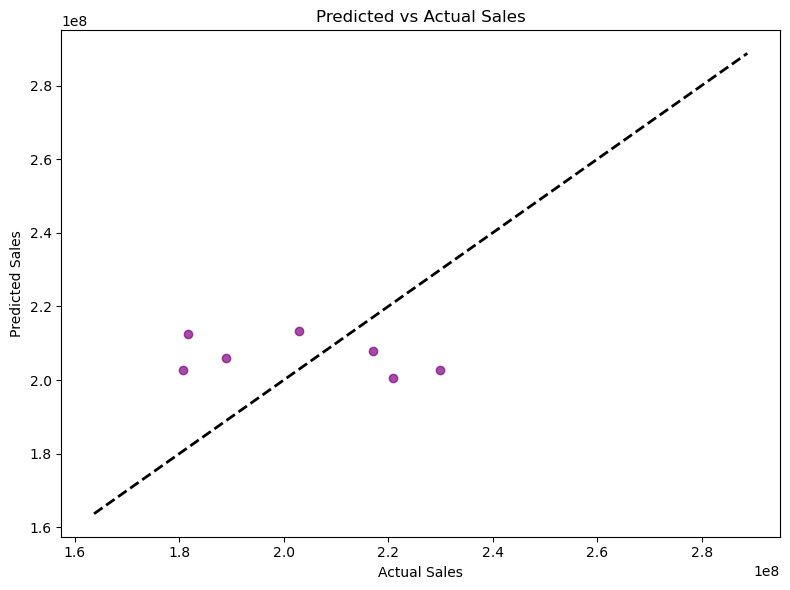

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs Actual Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()